In [1]:
import pandas as pd
file_path = "task 3 dataset.csv"  
df = pd.read_csv(file_path)
df.head()


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [2]:
df_raw = pd.read_csv(file_path, sep=";", header=None)
df_raw_cleaned = df_raw.replace({r'"': ''}, regex=True)
df_cleaned = df_raw_cleaned.iloc[:, 0].str.split(';', expand=True)
columns = df_cleaned.iloc[0, :]
df_cleaned.columns = columns
df_cleaned = df_cleaned.drop(index=0)
print(df_cleaned.head())

0 age        job  marital    education  default housing loan    contact month  \
1  56  housemaid  married     basic.4y       no      no   no  telephone   may   
2  57   services  married  high.school  unknown      no   no  telephone   may   
3  37   services  married  high.school       no     yes   no  telephone   may   
4  40     admin.  married     basic.6y       no      no   no  telephone   may   
5  56   services  married  high.school       no      no  yes  telephone   may   

0 day_of_week  ... campaign pdays previous     poutcome emp.var.rate  \
1         mon  ...        1   999        0  nonexistent          1.1   
2         mon  ...        1   999        0  nonexistent          1.1   
3         mon  ...        1   999        0  nonexistent          1.1   
4         mon  ...        1   999        0  nonexistent          1.1   
5         mon  ...        1   999        0  nonexistent          1.1   

0 cons.price.idx cons.conf.idx euribor3m nr.employed   y  
1         93.994     

In [3]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [4]:
df_cleaned.to_csv("cleaned_task_3_dataset.csv", index=False)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Convert categorical columns to numeric values
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
print(df_cleaned.head())

0  age  job  marital  education  default  housing  loan  contact  month  \
1   39    3        1          0        0        0     0        1      6   
2   40    7        1          3        1        0     0        1      6   
3   20    7        1          3        0        2     0        1      6   
4   23    0        1          1        0        0     0        1      6   
5   39    7        1          3        0        0     2        1      6   

0  day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
1            1  ...         0     26         0         1             8   
2            1  ...         0     26         0         1             8   
3            1  ...         0     26         0         1             8   
4            1  ...         0     26         0         1             8   
5            1  ...         0     26         0         1             8   

0  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
1              18              9        28

In [5]:
# Define features and target variable
X = df_cleaned.drop(columns=["y"])  # Drop target column
y = df_cleaned["y"]  # Target column
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))





(32950, 20) (8238, 20) (32950,) (8238,)
Accuracy: 0.8602816217528526
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7303
           1       0.39      0.43      0.41       935

    accuracy                           0.86      8238
   macro avg       0.66      0.67      0.67      8238
weighted avg       0.87      0.86      0.86      8238



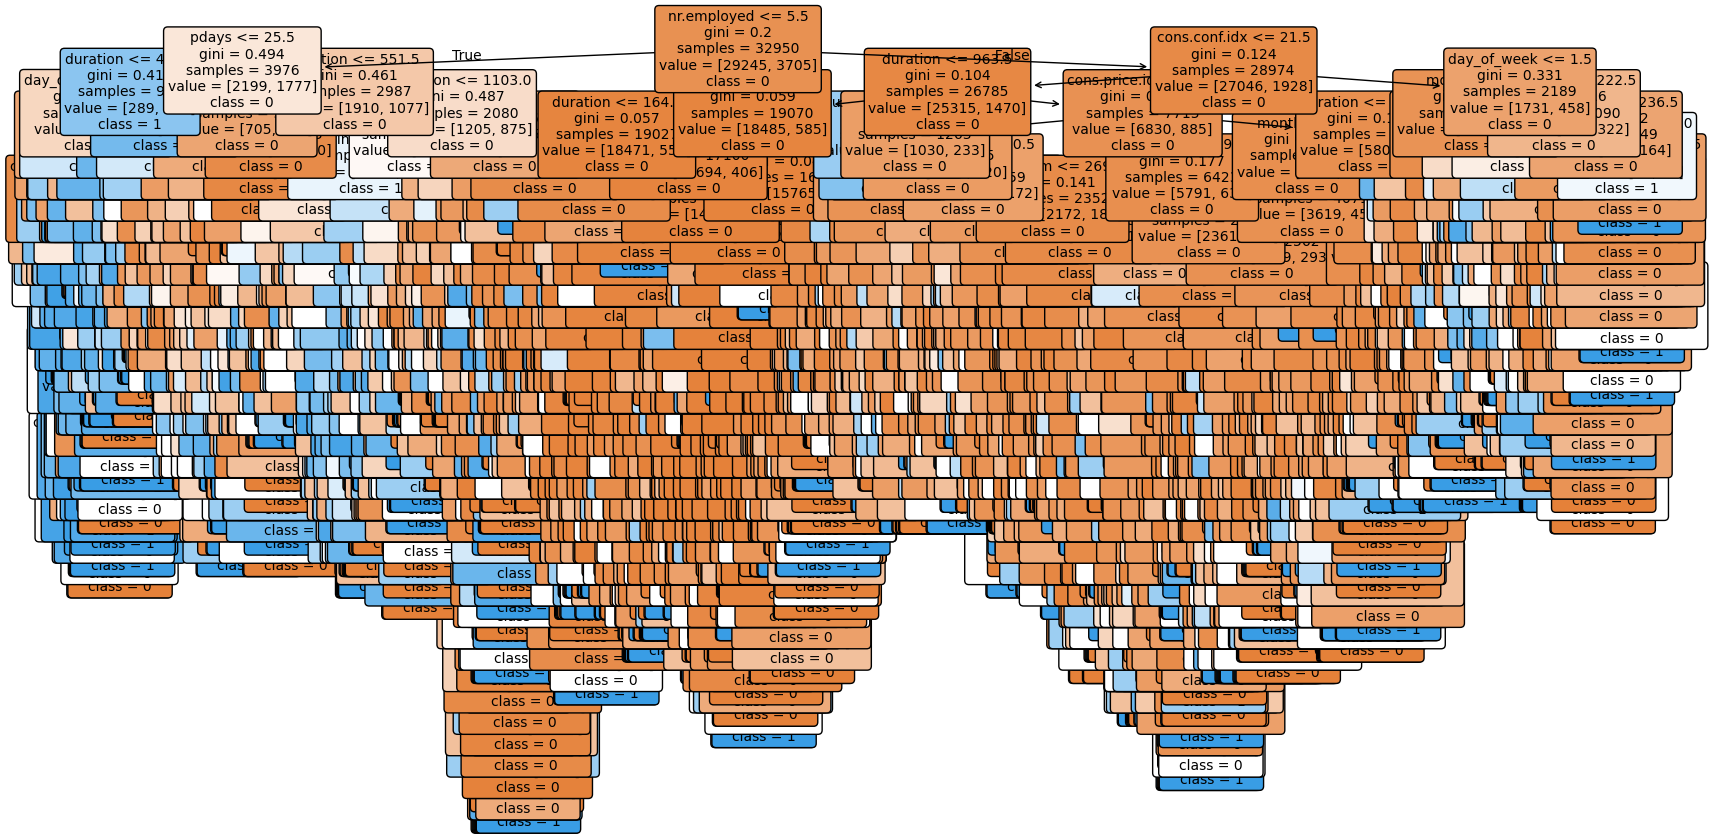

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
class_names = [str(cls) for cls in clf.classes_]
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,  
    class_names=class_names,  
    filled=True,              
    rounded=True,             
    fontsize=10               
)

# Display the plot
plt.show()
